In [1]:
import pandas as pd

In [2]:
smog = pd.read_excel('Smog.xlsx')

In [3]:
smog.drop(columns='Unnamed: 0', inplace=True)

In [4]:
smog['Data'] = smog['Data'].dt.round('H')  

In [5]:
smog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8771 entries, 0 to 8770
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data             8771 non-null   datetime64[ns]
 1   Dwutlenek_azotu  8771 non-null   float64       
 2   Tlenki_azotu     8771 non-null   float64       
 3   PM10             8771 non-null   float64       
 4   PM_2_5           8771 non-null   float64       
 5   Benzen           8771 non-null   float64       
 6   Tlenek_wegla     8771 non-null   float64       
 7   Kierunek_wiatru  8771 non-null   float64       
 8   Predkosc_wiatru  8771 non-null   float64       
 9   Temperatura      8771 non-null   float64       
 10  Wilgotnosc       8771 non-null   float64       
 11  Cisnienie        8771 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 822.4 KB


In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib as mpl

In [7]:
mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['axes.grid'] = False

In [8]:
columns = list(smog.columns)
columns

['Data',
 'Dwutlenek_azotu',
 'Tlenki_azotu',
 'PM10',
 'PM_2_5',
 'Benzen',
 'Tlenek_wegla',
 'Kierunek_wiatru',
 'Predkosc_wiatru',
 'Temperatura',
 'Wilgotnosc',
 'Cisnienie']

array([<AxesSubplot:xlabel='Data'>, <AxesSubplot:xlabel='Data'>,
       <AxesSubplot:xlabel='Data'>, <AxesSubplot:xlabel='Data'>,
       <AxesSubplot:xlabel='Data'>, <AxesSubplot:xlabel='Data'>,
       <AxesSubplot:xlabel='Data'>, <AxesSubplot:xlabel='Data'>,
       <AxesSubplot:xlabel='Data'>, <AxesSubplot:xlabel='Data'>,
       <AxesSubplot:xlabel='Data'>], dtype=object)

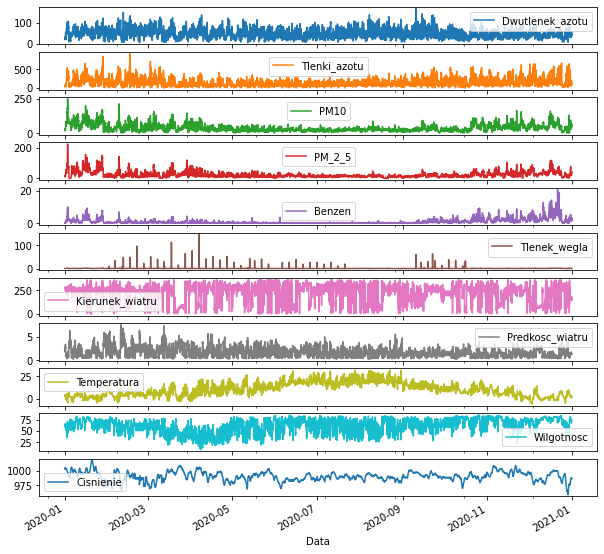

In [9]:
smog.set_index('Data')[columns[1:]].plot(subplots=True)

In [10]:
smog.describe()

,Dwutlenek_azotu,Tlenki_azotu,PM10,PM_2_5,Benzen,Tlenek_wegla,Kierunek_wiatru,Predkosc_wiatru,Temperatura,Wilgotnosc,Cisnienie
count,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000
mean,48.771656,144.881708,38.996283,23.107238,1.161349,0.914696,215.145921,1.653480,10.532149,61.215235,990.337655
std,21.036506,102.569510,26.791995,19.945110,1.701866,3.466739,90.207119,1.045425,7.690325,16.590187,7.825082
min,4.100000,0.100000,3.000000,0.000000,0.000000,0.000000,0.000000,0.258333,-6.131667,8.856667,958.881132
25%,33.300000,72.750000,21.100000,10.500000,0.200000,0.500000,161.300000,0.823333,4.298681,49.995417,985.670833
50%,47.100000,120.700000,31.100000,17.100000,0.500000,0.600000,246.000000,1.423333,9.817529,64.578333,990.145833
75%,61.800000,188.200000,48.800000,29.000000,1.400000,0.900000,278.000000,2.206667,16.572500,75.095000,995.750417
max,170.100000,931.500000,248.300000,226.100000,21.100000,147.000000,360.000000,7.626667,32.035000,85.378333,1017.685000


In [11]:
smog.set_index('Data', inplace=True)

In [12]:
smog

,Dwutlenek_azotu,Tlenki_azotu,PM10,PM_2_5,Benzen,Tlenek_wegla,Kierunek_wiatru,Predkosc_wiatru,Temperatura,Wilgotnosc,Cisnienie
Data,,,,,,,,,,,
2020-01-01 01:00:00,19.7,35.0,34.3,17.9,0.2,0.7,278.000000,2.471667,4.403333,62.058333,1002.798333
2020-01-01 02:00:00,22.8,43.5,32.2,15.0,0.2,0.7,279.000000,2.200000,4.113333,61.336667,1002.940000
2020-01-01 03:00:00,31.8,68.4,35.7,16.3,0.2,0.8,270.000000,1.906667,3.830000,62.410000,1003.261667
2020-01-01 04:00:00,26.4,52.6,34.0,15.0,0.2,0.7,278.000000,1.998333,3.480000,63.541667,1003.481667
2020-01-01 05:00:00,24.5,50.4,26.1,11.6,0.2,0.7,277.000000,2.248333,3.135000,64.786667,1003.888333
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,44.8,162.2,52.3,28.9,2.4,1.1,159.517241,1.351681,1.893145,73.365169,986.882812
2020-12-31 20:00:00,39.5,108.1,52.6,30.1,2.7,0.9,157.310345,1.428841,1.842346,73.492614,986.892811
2020-12-31 21:00:00,39.3,83.7,47.8,27.3,1.8,0.8,173.034483,1.409485,1.770589,73.711608,986.900253


In [13]:
smog_input = smog
smog_input

,Dwutlenek_azotu,Tlenki_azotu,PM10,PM_2_5,Benzen,Tlenek_wegla,Kierunek_wiatru,Predkosc_wiatru,Temperatura,Wilgotnosc,Cisnienie
Data,,,,,,,,,,,
2020-01-01 01:00:00,19.7,35.0,34.3,17.9,0.2,0.7,278.000000,2.471667,4.403333,62.058333,1002.798333
2020-01-01 02:00:00,22.8,43.5,32.2,15.0,0.2,0.7,279.000000,2.200000,4.113333,61.336667,1002.940000
2020-01-01 03:00:00,31.8,68.4,35.7,16.3,0.2,0.8,270.000000,1.906667,3.830000,62.410000,1003.261667
2020-01-01 04:00:00,26.4,52.6,34.0,15.0,0.2,0.7,278.000000,1.998333,3.480000,63.541667,1003.481667
2020-01-01 05:00:00,24.5,50.4,26.1,11.6,0.2,0.7,277.000000,2.248333,3.135000,64.786667,1003.888333
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,44.8,162.2,52.3,28.9,2.4,1.1,159.517241,1.351681,1.893145,73.365169,986.882812
2020-12-31 20:00:00,39.5,108.1,52.6,30.1,2.7,0.9,157.310345,1.428841,1.842346,73.492614,986.892811
2020-12-31 21:00:00,39.3,83.7,47.8,27.3,1.8,0.8,173.034483,1.409485,1.770589,73.711608,986.900253


In [14]:
scaler = MinMaxScaler()
smog_scaled = scaler.fit_transform(smog_input)
smog_scaled

array([[0.0939759 , 0.03747047, 0.12759886, ..., 0.2760262 , 0.69524971,
        0.74684205],
       [0.1126506 , 0.04659652, 0.11903791, ..., 0.26842795, 0.68581883,
        0.74925119],
       [0.16686747, 0.07333047, 0.13330616, ..., 0.26100437, 0.69984536,
        0.75472135],
       ...,
       [0.21204819, 0.08975735, 0.18263351, ..., 0.207046  , 0.84753697,
        0.47648431],
       [0.22409639, 0.1140219 , 0.20179372, ..., 0.20516025, 0.84911666,
        0.47513097],
       [0.21204819, 0.09780975, 0.25968202, ..., 0.20139145, 0.8541656 ,
        0.4727706 ]])

In [15]:
smog_scaled[0, 2:4] #wartości dla PM10 i PM25 po przeskalowaniu

array([0.12759886, 0.07916851])

In [16]:
features = smog_scaled
# target = smog_scaled[:,2:4] #predykcja tylko pm10 i pm25
target = smog_scaled #predykcja wszystkiego

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    shuffle=False)

In [18]:
print('Train data:')
print(X_train.shape, y_train.shape)
print('----------------------------')
print('Test data:')
print(X_test.shape, y_test.shape)

Train data:
(7016, 11) (7016, 11)
----------------------------
Test data:
(1755, 11) (1755, 11)


In [19]:
win_length = 120    #ostatnie 5 dni
batch_size = 32     #32 serie do uczenia
num_features = 11   #liczba features do uczenia

train_generator = TimeseriesGenerator(X_train, 
                                      y_train, 
                                      length=win_length, 
                                      sampling_rate=1, 
                                      batch_size=batch_size)

test_generator = TimeseriesGenerator(X_test, 
                                      y_test, 
                                      length=win_length, 
                                      sampling_rate=1, 
                                      batch_size=batch_size)

In [37]:
print(len(test_generator))
print(len(test_generator[0]))
print(len(test_generator[0][0]))
print(len(test_generator[0][0][0]))
print(len(test_generator[0][0][0][0]))

52
2
32
120
11


In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, 
                               input_shape=(win_length, num_features), 
                               return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(11))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120, 128)          71680     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 120, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 120, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 120, 128)          0         
                                                                 
 dropout (Dropout)           (None, 120, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=2,
                                                  mode='min')

In [24]:
model.compile(loss=tf.losses.MeanSquaredError(),
             optimizer=tf.optimizers.Adam(),
             metrics=[tf.metrics.MeanAbsoluteError()])

In [25]:
history = model.fit_generator(train_generator, epochs=50,
                              validation_data=test_generator,
                              shuffle=False,
                              callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


216/216 [==============================] - 29s 105ms/step - loss: 0.0266 - mean_absolute_error: 0.1185 - val_loss: 0.0233 - val_mean_absolute_error: 0.1150
Epoch 2/50
216/216 [==============================] - 21s 99ms/step - loss: 0.0190 - mean_absolute_error: 0.0986 - val_loss: 0.0202 - val_mean_absolute_error: 0.1045
Epoch 3/50
216/216 [==============================] - 21s 99ms/step - loss: 0.0152 - mean_absolute_error: 0.0867 - val_loss: 0.0165 - val_mean_absolute_error: 0.0915
Epoch 4/50
216/216 [==============================] - 21s 99ms/step - loss: 0.0130 - mean_absolute_error: 0.0786 - val_loss: 0.0146 - val_mean_absolute_error: 0.0847
Epoch 5/50
216/216 [==============================] - 21s 99ms/step - loss: 0.0117 - mean_absolute_error: 0.0737 - val_loss: 0.0147 - val_mean_absolute_error: 0.0842
Epoch 6/50
216/216 [==============================] - 21s 98ms/step - loss: 0.0110 - mean_absolute_error: 0.0706 - val_loss: 0.0133 - val_mean_absolute_error: 0.0789
Epoch 7/50
216

In [26]:
model.evaluate_generator(test_generator, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.006952278316020966, 0.0492820218205452]

In [27]:
predictions = model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [28]:
predictions

array([[0.27654976, 0.21846482, 0.11043459, ..., 0.4281682 , 0.93590915,
        0.51714855],
       [0.2531007 , 0.19967684, 0.10816503, ..., 0.40971795, 0.9355875 ,
        0.5133899 ],
       [0.1944162 , 0.15549207, 0.10067497, ..., 0.39263684, 0.9424123 ,
        0.5178256 ],
       ...,
       [0.17674538, 0.12362177, 0.13508041, ..., 0.2535095 , 0.876662  ,
        0.47237805],
       [0.14943129, 0.10619332, 0.12926224, ..., 0.2501025 , 0.8789319 ,
        0.47276205],
       [0.16382569, 0.12099972, 0.13463214, ..., 0.24997078, 0.86844045,
        0.47339907]], dtype=float32)

In [29]:
smog_pred = pd.DataFrame(predictions)
smog_pred

,0,1,2,3,4,5,6,7,8,9,10
0,0.276550,0.218465,0.110435,0.075568,0.075655,0.007071,0.819872,0.171728,0.428168,0.935909,0.517149
1,0.253101,0.199677,0.108165,0.075869,0.071998,0.007369,0.768069,0.181570,0.409718,0.935588,0.513390
2,0.194416,0.155492,0.100675,0.075335,0.067431,0.007745,0.804745,0.209432,0.392637,0.942412,0.517826
3,0.184045,0.148287,0.112458,0.088222,0.071648,0.008206,0.822707,0.167315,0.371503,0.955031,0.520176
4,0.123580,0.109153,0.105472,0.087507,0.066431,0.008322,0.809440,0.201078,0.358533,0.958927,0.519815
...,...,...,...,...,...,...,...,...,...,...,...
1630,0.245012,0.169493,0.138254,0.106826,0.063242,0.008215,0.533664,0.132123,0.268473,0.860862,0.472589
1631,0.224892,0.156657,0.140085,0.110762,0.063163,0.008403,0.525023,0.128390,0.260006,0.870658,0.472144
1632,0.176745,0.123622,0.135080,0.111407,0.059800,0.008609,0.519662,0.141353,0.253509,0.876662,0.472378
1633,0.149431,0.106193,0.129262,0.109396,0.057671,0.008465,0.539939,0.146158,0.250102,0.878932,0.472762


In [30]:
smog_pred_rev = scaler.inverse_transform(smog_pred)

In [31]:
smog_pred_rev

array([[ 50.00726  , 203.57812  ,  30.089605 , ...,  10.210087 ,
         80.474    , 989.29144  ],
       [ 46.114716 , 186.07901  ,  29.532883 , ...,   9.505901 ,
         80.44939  , 989.0705   ],
       [ 36.37309  , 144.92531  ,  27.69557  , ...,   8.853972 ,
         80.97163  , 989.3313   ],
       ...,
       [ 33.439735 , 115.24131  ,  36.135223 , ...,   3.5439456,
         75.94031  , 986.65875  ],
       [ 28.905594 ,  99.00845  ,  34.708027 , ...,   3.4139118,
         76.114    , 986.6814   ],
       [ 31.295065 , 112.79914  ,  36.025265 , ...,   3.4088848,
         75.31118  , 986.7189   ]], dtype=float32)

In [32]:
smog_final = smog_input[predictions.shape[0]*-1:]

In [33]:
smog_final.count()

Dwutlenek_azotu    1635
Tlenki_azotu       1635
PM10               1635
PM_2_5             1635
Benzen             1635
Tlenek_wegla       1635
Kierunek_wiatru    1635
Predkosc_wiatru    1635
Temperatura        1635
Wilgotnosc         1635
Cisnienie          1635
dtype: int64

In [34]:
smog_final['Dwutlenek_azotu_Pred'] = smog_pred_rev[:, 0]
smog_final['Tlenki_azotu_Pred'] = smog_pred_rev[:, 1]
smog_final['PM10_Pred'] = smog_pred_rev[:, 2]
smog_final['PM_2_5_Pred'] = smog_pred_rev[:, 3]
smog_final['Benzen_Pred'] = smog_pred_rev[:, 4]
smog_final['Tlenek_wegla_Pred'] = smog_pred_rev[:, 5]
smog_final['Kierunek_wiatru_Pred'] = smog_pred_rev[:, 6]
smog_final['Predkosc_wiatru_Pred'] = smog_pred_rev[:, 7]
smog_final['Temperatura_Pred'] = smog_pred_rev[:, 8]
smog_final['Wilgotnosc_Pred'] = smog_pred_rev[:, 9]
smog_final['Cisnienie_Pred'] = smog_pred_rev[:, 10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [35]:
smog_final

,Dwutlenek_azotu,Tlenki_azotu,PM10,PM_2_5,Benzen,Tlenek_wegla,Kierunek_wiatru,Predkosc_wiatru,Temperatura,Wilgotnosc,Cisnienie,Dwutlenek_azotu_Pred,Tlenki_azotu_Pred,PM10_Pred,PM_2_5_Pred,Benzen_Pred,Tlenek_wegla_Pred,Kierunek_wiatru_Pred,Predkosc_wiatru_Pred,Temperatura_Pred,Wilgotnosc_Pred,Cisnienie_Pred
Data,,,,,,,,,,,,,,,,,,,,,,
2020-10-24 19:00:00,48.9,280.6,50.4,21.6,2.2,1.1,279.000000,2.086667,9.420000,83.455000,990.400000,50.007259,203.578125,30.089605,17.085833,1.596317,1.039498,295.153839,1.523683,10.210087,80.473999,989.291443
2020-10-24 20:00:00,40.8,195.4,53.4,28.6,2.5,1.0,293.000000,2.421667,8.531667,83.931667,990.500000,46.114716,186.079010,29.532883,17.153902,1.519161,1.083176,276.504822,1.596201,9.505901,80.449387,989.070496
2020-10-24 21:00:00,36.6,229.1,62.9,35.0,4.0,1.3,314.000000,2.055000,7.468333,84.093333,990.401667,36.373089,144.925308,27.695570,17.033148,1.422793,1.138531,289.708130,1.801501,8.853972,80.971626,989.331299
2020-10-24 22:00:00,28.0,150.5,49.1,28.9,3.4,1.0,295.000000,2.208333,7.716667,84.470000,990.266667,34.651451,138.214294,30.585850,19.946955,1.511774,1.206214,296.174683,1.491164,8.047351,81.937256,989.469543
2020-10-24 23:00:00,23.5,122.9,60.8,39.2,5.1,1.1,294.000000,2.265000,7.663333,84.769167,990.027500,24.614304,101.764778,28.872307,19.785440,1.401698,1.223352,291.398590,1.739940,7.552341,82.235344,989.448242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,44.8,162.2,52.3,28.9,2.4,1.1,159.517241,1.351681,1.893145,73.365169,986.882812,44.772030,157.965805,36.913776,24.153414,1.334411,1.207580,192.119202,1.231862,4.115070,74.731247,986.671204
2020-12-31 20:00:00,39.5,108.1,52.6,30.1,2.7,0.9,157.310345,1.428841,1.842346,73.492614,986.892811,41.432121,146.009872,37.362854,25.043198,1.332740,1.235281,189.008301,1.204357,3.791908,75.480865,986.645020
2020-12-31 21:00:00,39.3,83.7,47.8,27.3,1.8,0.8,173.034483,1.409485,1.770589,73.711608,986.900253,33.439735,115.241310,36.135223,25.189127,1.261789,1.265483,187.078461,1.299866,3.543946,75.940308,986.658752


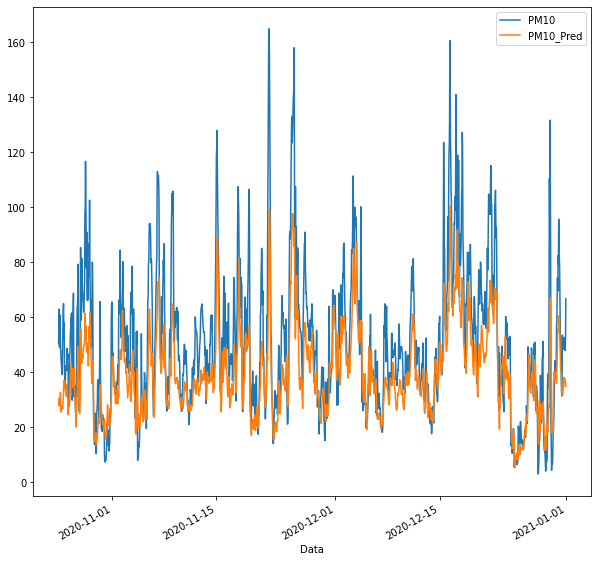

In [36]:
smog_final[['PM10', 'PM10_Pred']].plot()

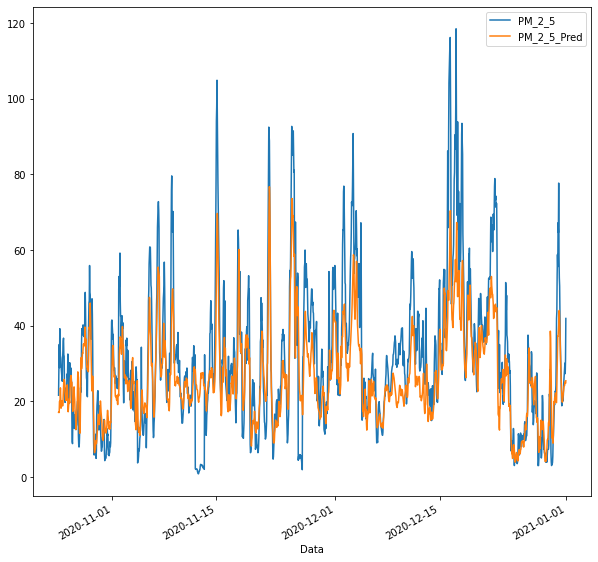

In [37]:
smog_final[['PM_2_5', 'PM_2_5_Pred']].plot()

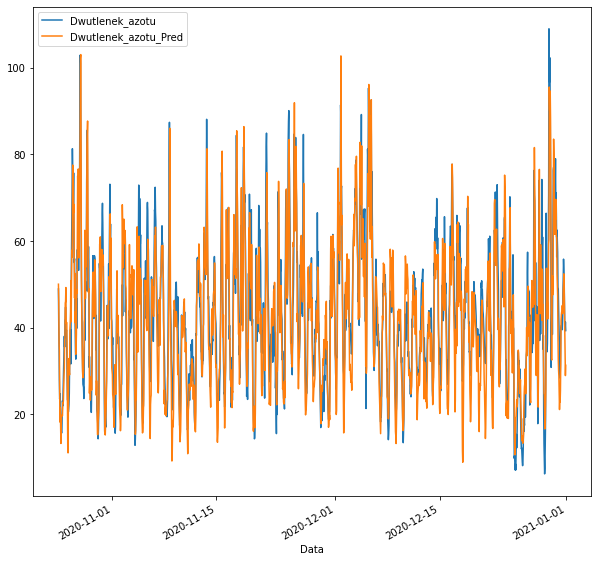

In [40]:
smog_final[['Dwutlenek_azotu', 'Dwutlenek_azotu_Pred']].plot()

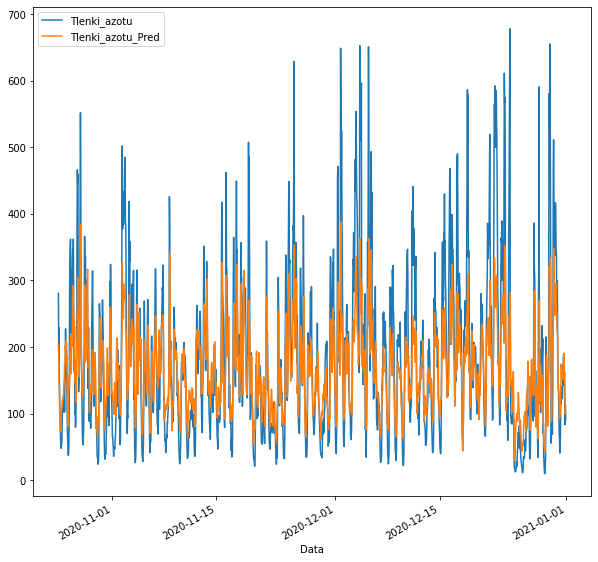

In [42]:
smog_final[['Tlenki_azotu', 'Tlenki_azotu_Pred']].plot()

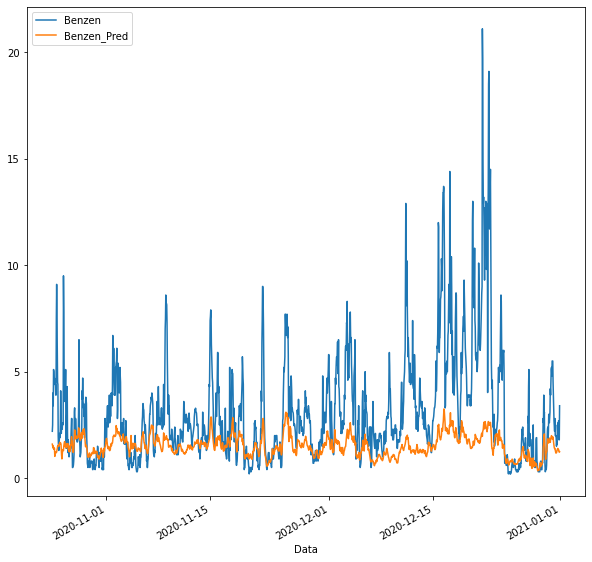

In [44]:
smog_final[['Benzen', 'Benzen_Pred']].plot()

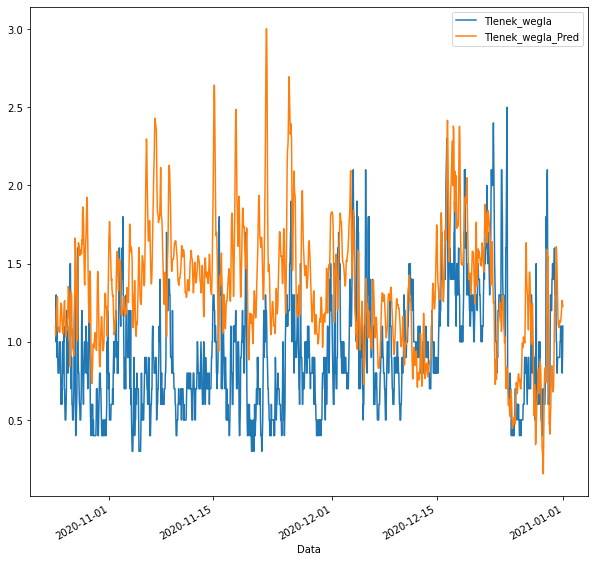

In [45]:
smog_final[['Tlenek_wegla', 'Tlenek_wegla_Pred']].plot()

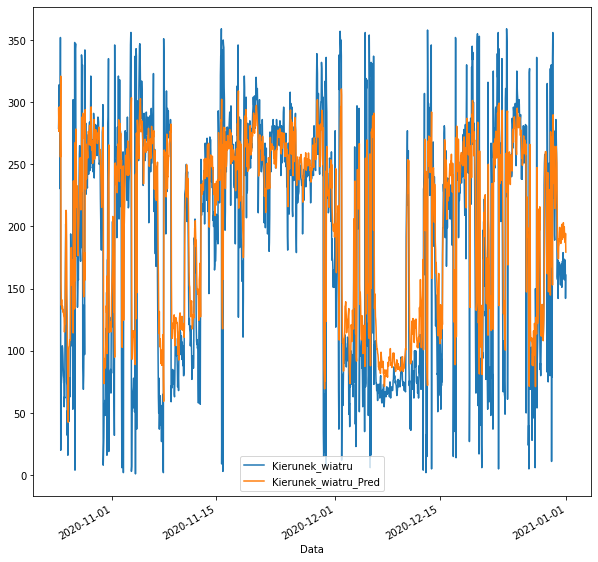

In [47]:
smog_final[['Kierunek_wiatru', 'Kierunek_wiatru_Pred']].plot()

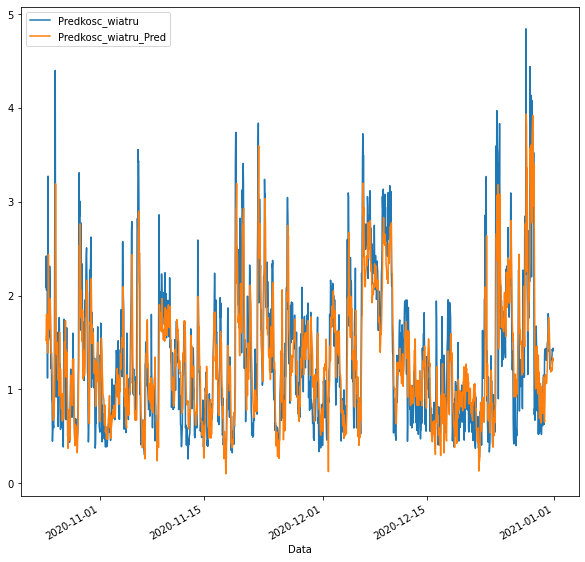

In [48]:
smog_final[['Predkosc_wiatru', 'Predkosc_wiatru_Pred']].plot()

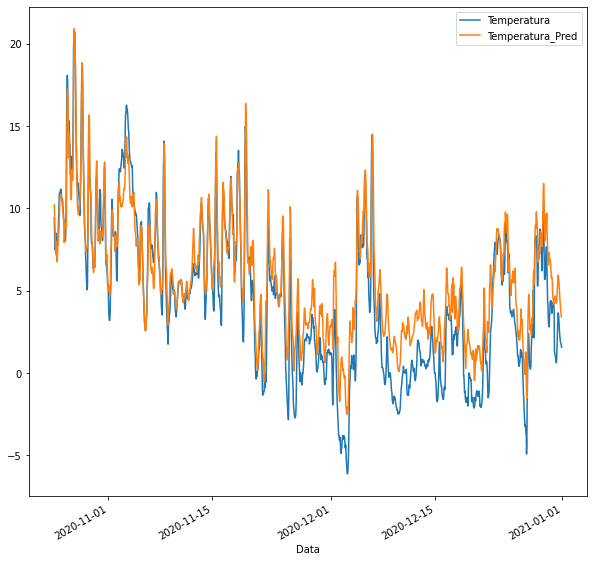

In [49]:
smog_final[['Temperatura', 'Temperatura_Pred']].plot()

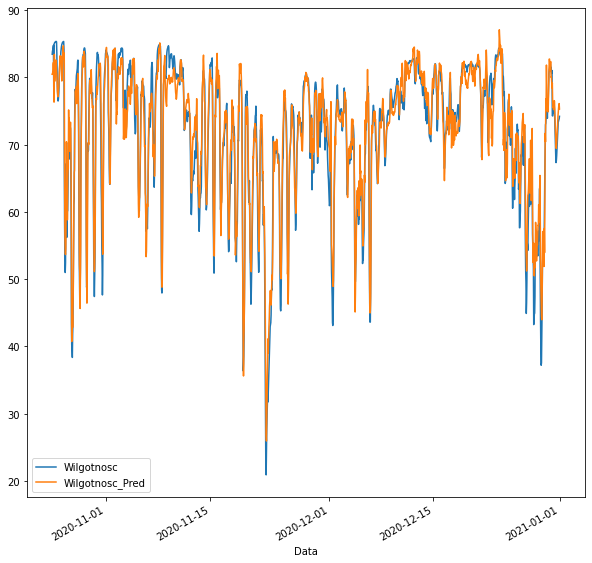

In [50]:
smog_final[['Wilgotnosc', 'Wilgotnosc_Pred']].plot()

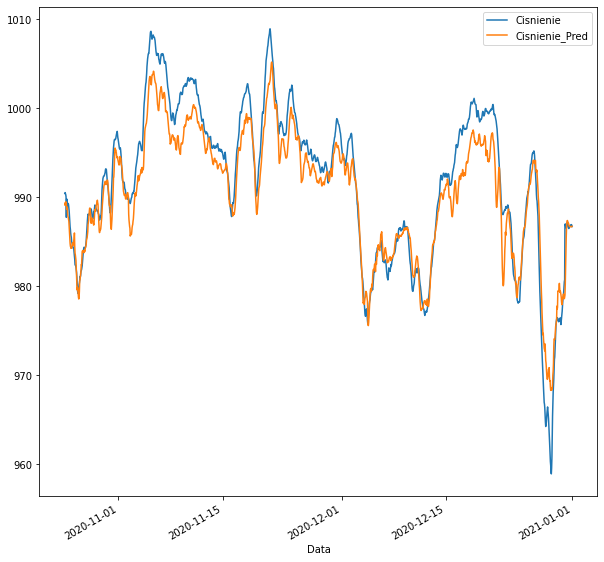

In [51]:
smog_final[['Cisnienie', 'Cisnienie_Pred']].plot()